<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means bad cases

K-Means works under the assumption that the cluster centroids are representative of the data in that cluster. Here we work with a synthetic dataset that violates that assumption.

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

In [3]:
## Create data points (circles)

# Make Random Circles
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [5]:
## Convert data into a DataFrame

# Declare the column names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [7]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean    -0.001399   -0.001897
std      0.529313    0.525980
min     -1.098733   -1.085933
25%     -0.298049   -0.300690
50%      0.007296    0.004562
75%      0.284881    0.291137
max      1.069469    1.030389

Sample of X__________________________________________________
          A         B
0  0.022887  1.030389
1  0.725384 -0.719147
2  0.952604  0.526302
3  0.543651  0.767329
4 -0.223272  0.181435


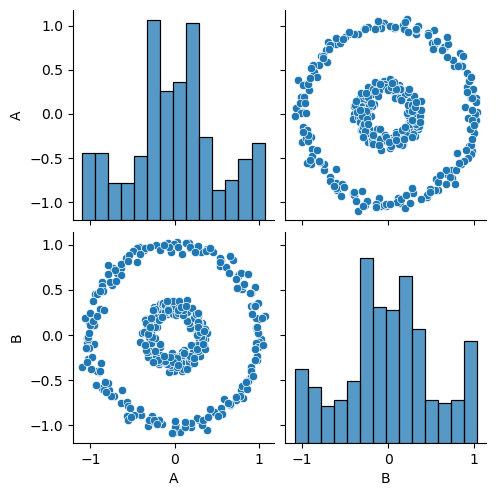

In [9]:
sbn.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

### Question: Which features could/should be used to cluster the data points?

In [11]:
def print_centroids(centroids):
    global step
    if show_steps:
        print('(Step) Step %d' % step)
        for c in centroids:
            print(', '.join(['%.3f' % f for f in c]))
        step += 1

In [13]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)

    print_centroids(centroids)

    return centroids

In [15]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt( np.square(p - q).sum() )
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [17]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y == i].mean()
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i])

    print_centroids(c)

    return c

In [19]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')

    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    for i in range(len(centroids)):
        for s in range(step + 1):
            e = [z[i][0] for z in centroids_list]
            f = [z[i][1] for z in centroids_list]
            ax.plot(e, f, c = 'k', marker = '+', linewidth = 1)

        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')

    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

In [21]:
## Flag intermediate output

step = 0
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [23]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 5

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break


(Step) Step 0
-1.016, -0.617
0.833, -0.790
-0.861, -0.305
-0.594, 0.905
0.615, -0.079
(Step) Step 1
-0.522, -0.805
0.483, -0.810
-0.494, -0.088
-0.279, 0.686
0.347, 0.080
(Step) Step 2
-0.518, -0.799
0.515, -0.782
-0.439, -0.074
-0.240, 0.702
0.382, 0.099
(Step) Step 3
-0.536, -0.774
0.548, -0.733
-0.397, -0.053
-0.228, 0.726
0.395, 0.121
(Step) Step 4
-0.534, -0.764
0.562, -0.696
-0.363, -0.044
-0.235, 0.754
0.405, 0.143
(Step) Step 5
-0.552, -0.737
0.566, -0.681
-0.329, -0.028
-0.247, 0.792
0.412, 0.154
(Step) Step 6
-0.562, -0.726
0.569, -0.680
-0.290, -0.022
-0.281, 0.820
0.429, 0.165
(Step) Step 7
-0.586, -0.707
0.567, -0.693
-0.267, -0.020
-0.304, 0.836
0.440, 0.180
(Step) Step 8
-0.632, -0.668
0.544, -0.705
-0.245, -0.022
-0.304, 0.836
0.451, 0.191
(Step) Step 9
-0.691, -0.598
0.528, -0.728
-0.204, -0.026
-0.316, 0.827
0.463, 0.198
(Step) Step 10
-0.726, -0.517
0.536, -0.736
-0.155, -0.036
-0.330, 0.825
0.473, 0.215
(Step) Step 11
-0.750, -0.469
0.528, -0.750
-0.113, -0.047
-0.3

### Question: What happens if the algorithm is run multiple times?
### Question: What happens if `K` is changed?

In [25]:
You might get different results because K-Means starts with random centroids each time.

SyntaxError: invalid syntax (4266171118.py, line 1)

Changing K changes the number of clusters, which can lead to over-splitting or under-grouping the data.

>

>



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



